In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import cv2
import tensorflow
%matplotlib inline

In [2]:
pip install opencv-contrib-python

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
train_dir = './Emergency_VehiclesCopy/train/'
test_dir = './Emergency_VehiclesCopy/test/'

Reading the first Image

In [5]:
image = cv2.imread('./Emergency_VehiclesCopy/train/1.jpg')
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB) # converting to RGB 

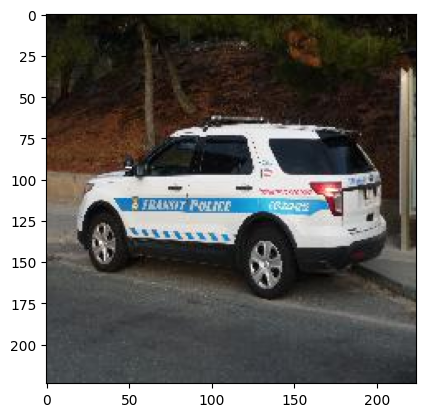

In [6]:
plt.imshow(image)

In [6]:
# sns.countplot(x='emergency_or_not' , data=train_df)

In [7]:
image.shape

(224, 224, 3)

Preprocessing

In [8]:
from keras.preprocessing.image import ImageDataGenerator

In [9]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [10]:
# Here we are applying our desired transformations  
image_gen = ImageDataGenerator(  
    rotation_range=20,# specifies the rotation to be 20% 
    width_shift_range=0.1, # specifies the width shift of 10% 
    height_shift_range=0.1,# specifies the height shift of 10% 
    shear_range=0.20, # crops part of the image  
    zoom_range=0.20, # #zooms the image by 20% 
    fill_mode='nearest', # fills using the nearest pixel  
    horizontal_flip=True, # Secifies the horizontal flip  
    rescale=1/255 # scales the image
)

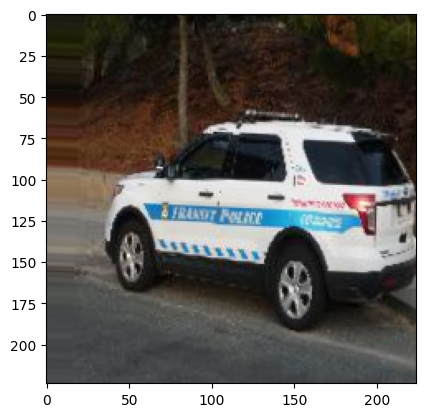

In [11]:
# showing the transformation 
plt.imshow(image_gen.random_transform(image)) 

In [12]:
train_df = pd.read_csv('./Emergency_Vehicles/train.csv')
test_df = pd.read_csv('./Emergency_Vehicles/test.csv')

In [13]:
train_df

,image_names,emergency_or_not
0,1503.jpg,0
1,1420.jpg,0
2,1764.jpg,0
3,1356.jpg,0
4,1117.jpg,0
...,...,...
1641,1638.jpg,0
1642,1095.jpg,0
1643,1130.jpg,0
1644,1294.jpg,0


In [14]:
train_df['emergency_or_not']=train_df['emergency_or_not'].astype(str) 

In [15]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1646 entries, 0 to 1645
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   image_names       1646 non-null   object
 1   emergency_or_not  1646 non-null   object
dtypes: object(2)
memory usage: 25.8+ KB


In [16]:
train_generator=image_gen.flow_from_dataframe(dataframe=train_df[:1150], # specify the dataset used for trainin
                                              directory=train_dir, # specify the path to the directory 
                                              x_col='image_names', # specify the names of the images 
                                              y_col='emergency_or_not', # specifies the class labels 
                                              class_mode='binary', # specifies the kind of classification 
                                              target_size=(224,224), # specifies the dimension to resize the im
                                              batch_size=50# defines the batch size  
                                             ) 
validation_generator=image_gen.flow_from_dataframe(dataframe=train_df[1150:], # specify the dataset used for tr
                                              directory=train_dir, # specify the path to the directory 
                                              x_col='image_names', # specify the names of the images 
                                              y_col='emergency_or_not', # specifies the class labels 
                                              class_mode='binary', # specifies the kind of classification 
                                              target_size=(224,224), # specifies the dimension to resize the im
                                              batch_size=50 # defines the batch size 
                                                  )

Found 1150 validated image filenames belonging to 2 classes.
Found 496 validated image filenames belonging to 2 classes.


Constructor Stage

In [17]:
from keras.models import Sequential 
from keras.layers import Activation,Dropout,Conv2D,MaxPooling2D,Flatten,Dense,BatchNormalization 

In [18]:
model = Sequential() 
model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(224,224,3),activation = 'relu',padding = 'same')) 
model.add(MaxPooling2D(pool_size=(2,2))) 
model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(224,224,3),activation = 'relu', padding = 'valid'))
model.add(MaxPooling2D(pool_size=(2,2))) 
model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(224,224,3),activation = 'relu')) 
model.add(MaxPooling2D(pool_size=(2,2))) 
model.add(BatchNormalization()) 
 
model.add(Flatten()) 
 
model.add(Dense(50,activation = 'relu')) 
model.add(Dropout(0.2)) 
model.add(Dense(1,activation = 'sigmoid')) 

Compilation Stage

In [19]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = 'accuracy')

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 110, 110, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 55, 55, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 53, 53, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 32)       0

Training Stage

In [21]:
history=model.fit_generator(train_generator,epochs = 10,validation_data = validation_generator)

C:\Users\HP\AppData\Local\Temp\ipykernel_19644\2704492499.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history=model.fit_generator(train_generator,epochs = 10,validation_data = validation_generator)


Epoch 1/10
23/23 [==============================] - 89s 4s/step - loss: 0.8064 - accuracy: 0.6313 - val_loss: 0.6658 - val_accuracy: 0.7419
Epoch 2/10
23/23 [==============================] - 107s 5s/step - loss: 0.5852 - accuracy: 0.7017 - val_loss: 0.6393 - val_accuracy: 0.6815
Epoch 3/10
23/23 [==============================] - 148s 6s/step - loss: 0.5431 - accuracy: 0.7209 - val_loss: 0.6550 - val_accuracy: 0.6250
Epoch 4/10
23/23 [==============================] - 138s 6s/step - loss: 0.5433 - accuracy: 0.7183 - val_loss: 0.6486 - val_accuracy: 0.6069
Epoch 5/10
23/23 [==============================] - 126s 6s/step - loss: 0.5177 - accuracy: 0.7383 - val_loss: 0.6304 - val_accuracy: 0.6089
Epoch 6/10
23/23 [==============================] - 164s 7s/step - loss: 0.4978 - accuracy: 0.7739 - val_loss: 0.6376 - val_accuracy: 0.6069
Epoch 7/10
23/23 [==============================] - 168s 7s/step - loss: 0.4613 - accuracy: 0.7817 - val_loss: 0.6163 - val_accuracy: 0.7460
Epoch 8/10
23/

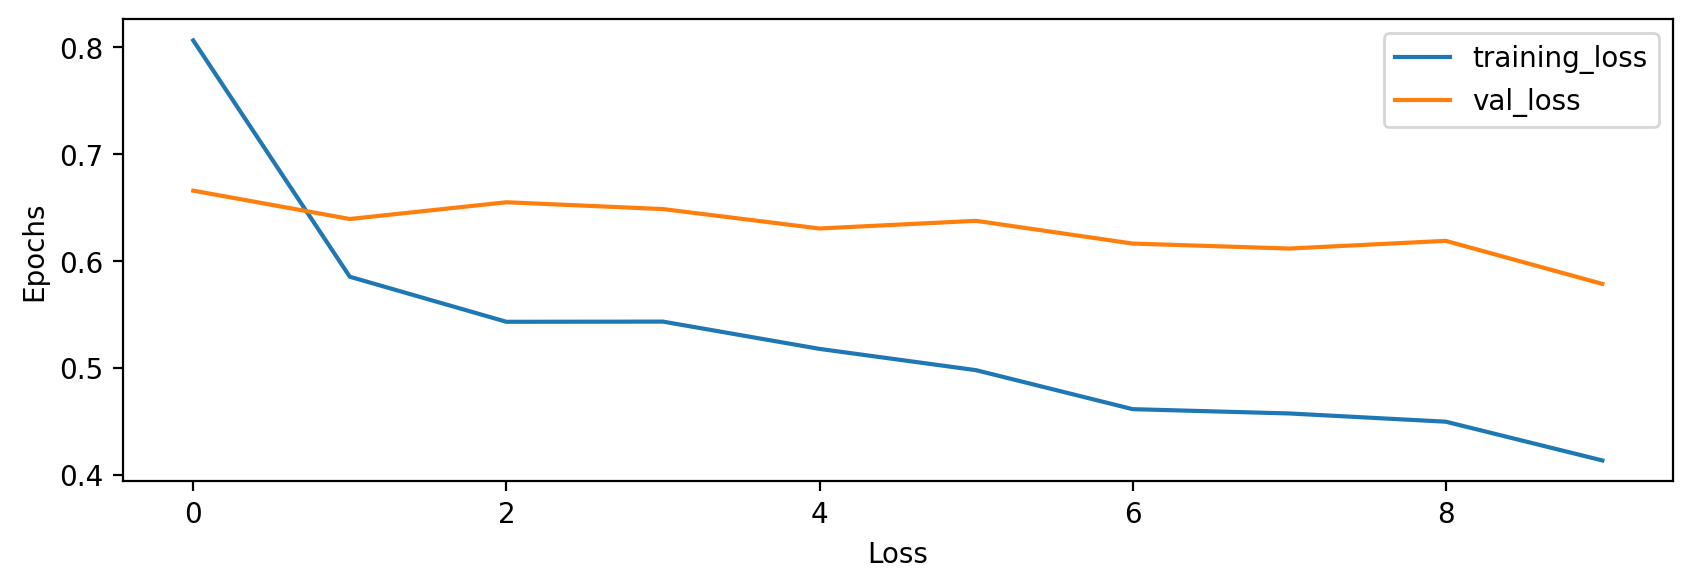

In [22]:
## checking for overfitting  
history_df = pd.DataFrame(history.history) 
plt.figure(dpi=200, figsize = (10,3)) 
plt.plot(history_df['loss'], 
        label='training_loss') 
plt.plot(history_df['val_loss'], 
        label='val_loss') 
plt.xlabel('Loss') 
plt.ylabel('Epochs') 
plt.legend() 
plt.show() 

In [26]:
history1=model.fit_generator(train_generator,epochs = 15,validation_data = validation_generator)

C:\Users\HP\AppData\Local\Temp\ipykernel_5336\3408691549.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history=model.fit_generator(train_generator,epochs = 15,validation_data = validation_generator)


Epoch 1/15
23/23 [==============================] - 77s 3s/step - loss: 0.3529 - accuracy: 0.8461 - val_loss: 0.5836 - val_accuracy: 0.6895
Epoch 2/15
23/23 [==============================] - 69s 3s/step - loss: 0.3259 - accuracy: 0.8609 - val_loss: 0.5733 - val_accuracy: 0.6714
Epoch 3/15
23/23 [==============================] - 92s 4s/step - loss: 0.3369 - accuracy: 0.8643 - val_loss: 0.5617 - val_accuracy: 0.8367
Epoch 4/15
23/23 [==============================] - 81s 4s/step - loss: 0.3230 - accuracy: 0.8696 - val_loss: 0.5585 - val_accuracy: 0.7984
Epoch 5/15
23/23 [==============================] - 95s 4s/step - loss: 0.3505 - accuracy: 0.8470 - val_loss: 0.5450 - val_accuracy: 0.8085
Epoch 6/15
23/23 [==============================] - 92s 4s/step - loss: 0.3173 - accuracy: 0.8661 - val_loss: 0.5228 - val_accuracy: 0.7964
Epoch 7/15
23/23 [==============================] - 86s 4s/step - loss: 0.3117 - accuracy: 0.8704 - val_loss: 0.4823 - val_accuracy: 0.7641
Epoch 8/15
23/23 [==

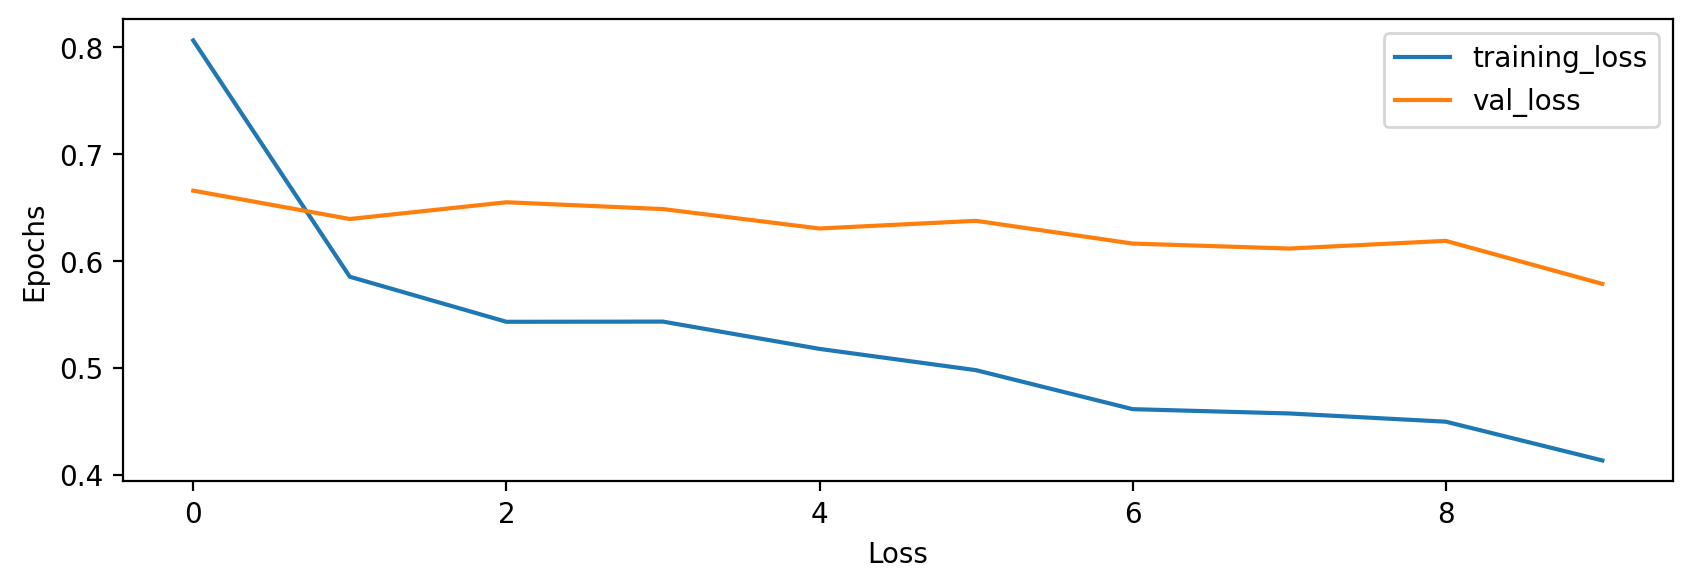

In [24]:
## checking for overfitting  
history_df = pd.DataFrame(history.history1) 
plt.figure(dpi=200, figsize = (10,3)) 
plt.plot(history_df['loss'], 
        label='training_loss') 
plt.plot(history_df['val_loss'], 
        label='val_loss') 
plt.xlabel('Loss') 
plt.ylabel('Epochs') 
plt.legend() 
plt.show() 

In [25]:
history2=model.fit_generator(train_generator,epochs = 20,validation_data = validation_generator)

C:\Users\HP\AppData\Local\Temp\ipykernel_19644\1760047929.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history=model.fit_generator(train_generator,epochs = 20,validation_data = validation_generator)


Epoch 1/20
23/23 [==============================] - 127s 5s/step - loss: 0.4202 - accuracy: 0.8191 - val_loss: 0.5963 - val_accuracy: 0.6331
Epoch 2/20
23/23 [==============================] - 121s 5s/step - loss: 0.4031 - accuracy: 0.8217 - val_loss: 0.5631 - val_accuracy: 0.6633
Epoch 3/20
23/23 [==============================] - 121s 5s/step - loss: 0.3614 - accuracy: 0.8383 - val_loss: 0.5408 - val_accuracy: 0.7177
Epoch 4/20
23/23 [==============================] - 120s 5s/step - loss: 0.3691 - accuracy: 0.8322 - val_loss: 0.5239 - val_accuracy: 0.8266
Epoch 5/20
23/23 [==============================] - 118s 5s/step - loss: 0.3885 - accuracy: 0.8252 - val_loss: 0.5226 - val_accuracy: 0.7419
Epoch 6/20
23/23 [==============================] - 119s 5s/step - loss: 0.3531 - accuracy: 0.8609 - val_loss: 0.5065 - val_accuracy: 0.7621
Epoch 7/20
23/23 [==============================] - 130s 6s/step - loss: 0.3435 - accuracy: 0.8478 - val_loss: 0.7430 - val_accuracy: 0.6270
Epoch 8/20
23

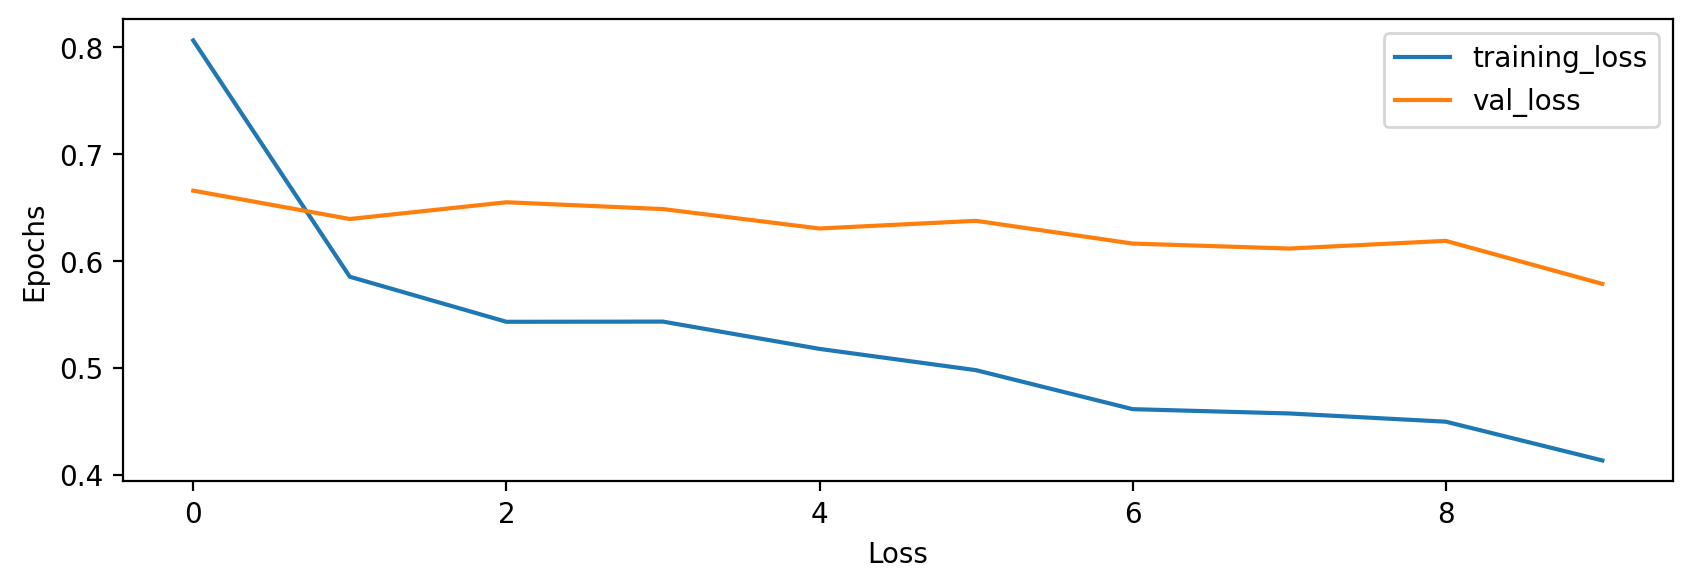

In [23]:
## checking for overfitting  
history_df = pd.DataFrame(history.history2) 
plt.figure(dpi=200, figsize = (10,3)) 
plt.plot(history_df['loss'], 
        label='training_loss') 
plt.plot(history_df['val_loss'], 
        label='val_loss') 
plt.xlabel('Loss') 
plt.ylabel('Epochs') 
plt.legend() 
plt.show() 

Evaluation Stage

In [30]:
test_generator=image_gen.flow_from_dataframe(dataframe=test_df, # specify the dataset used for training 
                                              directory=test_dir, # specify the path to the directory 
                                              x_col='image_names', # specify the names of the images 
                                              #y_col='emergency_or_not', # specifies the class labels 
                                              class_mode=None, # specifies the kind of classification 
                                              target_size=(224,224), # specifies the dimension to resize the im
                                             batch_size=1 # defines the batch size  
                                              
                                              )  

Found 706 validated image filenames.


In [27]:
results = model.evaluate(validation_generator)

10/10 [==============================] - 14s 1s/step - loss: 0.8323 - accuracy: 0.6411


In [42]:
history3=model.fit_generator(train_generator,epochs = 5,validation_data = validation_generator)

C:\Users\HP\AppData\Local\Temp\ipykernel_19644\2930682186.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history3=model.fit_generator(train_generator,epochs = 5,validation_data = validation_generator)


Epoch 1/5
23/23 [==============================] - 85s 4s/step - loss: 0.2736 - accuracy: 0.8948 - val_loss: 0.3211 - val_accuracy: 0.8528
Epoch 2/5
23/23 [==============================] - 78s 3s/step - loss: 0.2736 - accuracy: 0.8748 - val_loss: 0.3138 - val_accuracy: 0.8629
Epoch 3/5
23/23 [==============================] - 74s 3s/step - loss: 0.2676 - accuracy: 0.8957 - val_loss: 0.3280 - val_accuracy: 0.8750
Epoch 4/5
23/23 [==============================] - 96s 4s/step - loss: 0.3316 - accuracy: 0.8670 - val_loss: 0.6205 - val_accuracy: 0.7500
Epoch 5/5
23/23 [==============================] - 90s 4s/step - loss: 0.2849 - accuracy: 0.8774 - val_loss: 0.4370 - val_accuracy: 0.8145


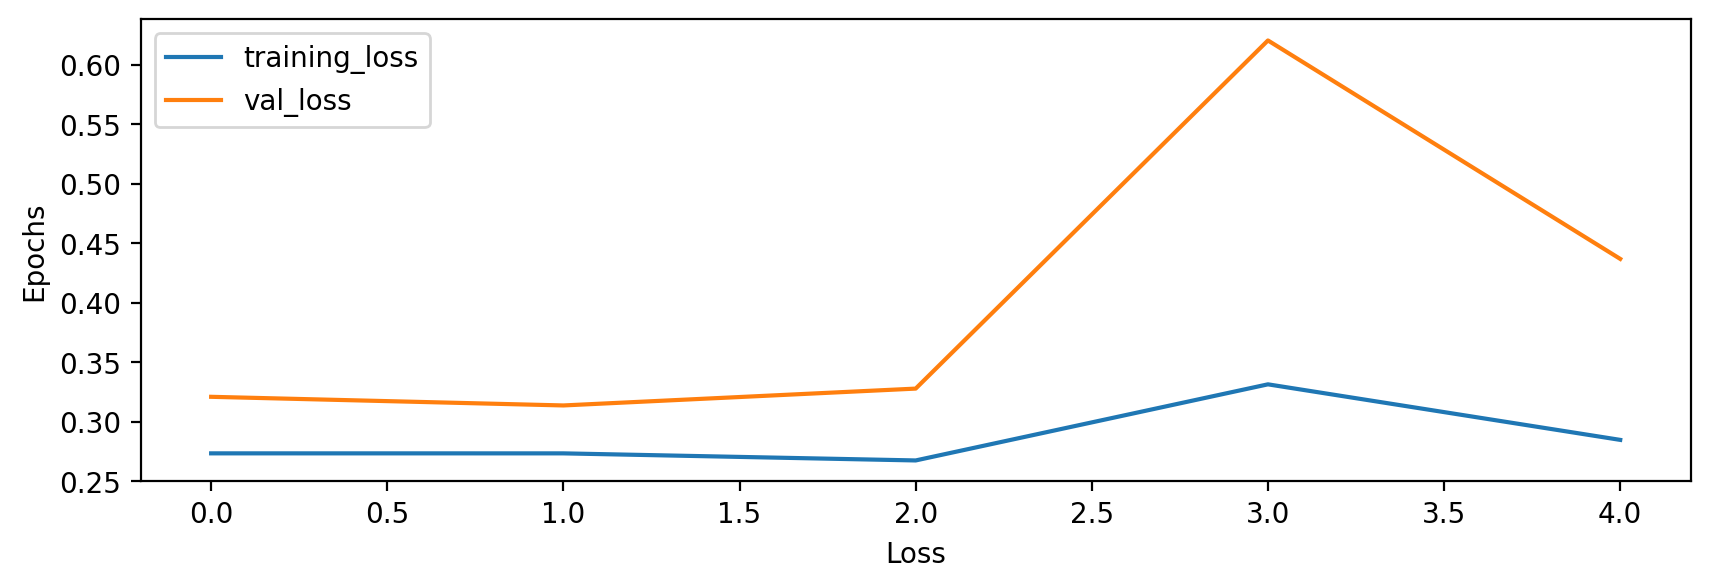

In [45]:
## checking for overfitting  
history_df = pd.DataFrame(history3.history) 
plt.figure(dpi=200, figsize = (10,3)) 
plt.plot(history_df['loss'], 
        label='training_loss') 
plt.plot(history_df['val_loss'], 
        label='val_loss') 
plt.xlabel('Loss') 
plt.ylabel('Epochs') 
plt.legend() 
plt.show() 